In [1]:
%matplotlib inline

import random

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.pylabtools import figsize

In [2]:
figsize(15, 9)
figsize(15, 9)

In [81]:
class Agent(object):
    def __init__(self, starting_wealth, take_amt, give_amt, take_from_poor_probability):
        self.wealth = starting_wealth
        self.take_amt = take_amt
        self.give_amt = give_amt
        self.take_from_poor_probability = take_from_poor_probability

    def is_wealthier(self, other):
        return self.wealth > other.wealth

    def exchange(self, other):
        wealthy, poor = (self, other) if self.is_wealthier(other) else (other, self)

        if random.random() < self.take_from_poor_probability:
            take_from_poor = poor.wealth * self.take_amt
            wealthy.wealth += take_from_poor
            poor.wealth -= take_from_poor

        else:
            give_to_poor = poor.wealth * self.give_amt
            wealthy.wealth -= give_to_poor
            poor.wealth += give_to_poor

poorest: 0.29021903298638574
wealthiest: 136913.5516593412
wealthiest is 471759.3820449531 times wealthier than the poorest
percent who lost wealth: 0.6971


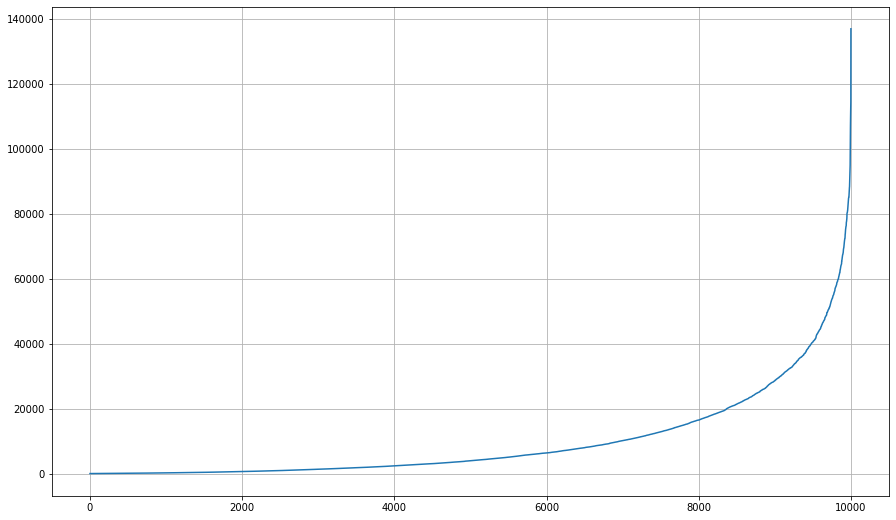

In [82]:
N_ROUNDS = 1_000_000
N_AGENTS = 10_000

TAKE_AMOUNT = .17
GIVE_AMOUNT = .2

START_WEALTH = 10000.0
TAKE_FROM_POOR_PROBABILITY = 0.5

agents = [Agent(START_WEALTH, TAKE_AMOUNT, GIVE_AMOUNT, TAKE_FROM_POOR_PROBABILITY) for _ in range(N_AGENTS)]

for _ in range(N_ROUNDS):
    a, b = random.choices(agents, k=2)
    a.exchange(b)

sorted_by_wealth = sorted(agents, key=lambda x: x.wealth)

wealth = [a.wealth for a in sorted_by_wealth]

print('poorest: %s' % min(wealth))
print('wealthiest: %s' % max(wealth))
print('wealthiest is %s times wealthier than the poorest' % (max(wealth) / min(wealth)))
print('percent who lost wealth: %s' % (len([x for x in wealth if x < START_WEALTH]) / len(wealth)))

plt.plot(wealth)
plt.grid()
plt.show()